In [ ]:
"""
Created on Tue Jul 13 14:50:37 2021

@author: A.Aladdin
@describtion : Trying to understand Exponential weighted moving average EWMA.
@target : trying to get hands-on understanding coding & visualization.
"""

In [ ]:

'''
imagine we have data of prices of a stock (per day or hour anything)
we want to plot the EWMA ontop of it to get a smooth representation
of the historical path instead of the random fractal fluctuations of per (day/hour).

equations : 
    ewma(i) = value(i) * (beta) + ewma(i-1) * (1-beta)
    at ewma(0)=zero for ex.. ,, 
    ewma(1) = value(1) * fraction --> 
    this fraction represent how much we depend on current observation 
    (if 1 then we read it as it is )
    (if 0 (for ex) we dont depend on it at all )
    (a fraction between {0,1} means your dependence on current observation)
    
    now that we took a fraction of the current observation 
    the next iteration is where the magic happens ->
    ewma(2) = value(2) * (fraction) + ewma(1) * (1-fraction)
    we can say its ewma(2) = value(2) * fraction + [value(1) * fraction] * (1-fraction)!
    
    lets decompose it  .--> 
    ewma(2) = value(2) * fraction 
            + [value(1) * fraction] 
            - [value(1) * fraction * fraction ] 
    so we depend on a fraction of the current value(2)
    also a fraction of the past value(1) smoothed by fraction**2 ("adjusted by the -ve sign")
    
    meaning as we go further the ewma will depend mainly on the current value 
            and on the past (n) values smoothed by (fraction**n) 
            as the values in the history increase (n) the term 
            (fraction**n) decrease our dependence on it by an exponential factor.
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## random test input
prices_arr = np.array([14.2,16.2,17.2,16.3,13.2,11.5,13.4,12.9,13.2])

In [3]:
def ewma(arr,beta):
    '''
    Parameters
    ----------
    arr : Input Values
    beta : fraction representing dependence of values

    Returns
    -------
    ewm_list : the EWMA of the input array
    
    --just visualize flipping points
    ewm_bull_band : Trending Up Band
    ewm_bear_band : Trending Down Band
    
    '''
    
    ewm_list = []
    ewm_bull_band = []
    ewm_bear_band = []
    beta_bear = -(beta * 0.75 ) 
    beta_bull = (beta * 0.75 ) 
    ewm = arr[0] # just an offset to start on the real curve
    ewm_bull = arr[0]
    ewm_bear = arr[0]
    for i_element in arr:
        ewm = i_element * beta + ewm * (1-beta)
        ewm_bull = i_element * beta_bull + ewm * (1-beta_bull)
        ewm_bear = i_element * beta_bear + ewm * (1-beta_bear)
        ewm_list.append(ewm)
        ewm_bull_band.append(ewm_bull)
        ewm_bear_band.append(ewm_bear)
        
    return ewm_list , ewm_bull_band,ewm_bear_band

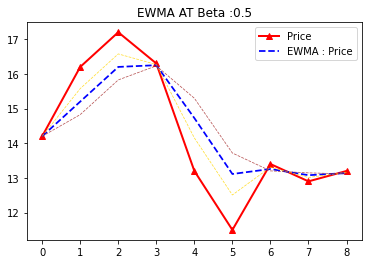

In [7]:
beta = 0.5
ewm_arr ,ewm_arr_bull,ewm_arr_bear = ewma(prices_arr,beta)
plt.title('EWMA AT Beta :' + str(beta))
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price' )
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')
plt.plot(ewm_arr_bull,'gold',linewidth=0.75 ,linestyle='--',alpha=0.8)
plt.plot(ewm_arr_bear,'brown',linewidth=0.75  ,linestyle='--',alpha=0.8)

plt.legend()
plt.show()

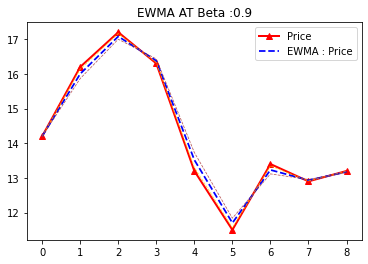

In [8]:
beta = 0.9
ewm_arr ,ewm_arr_bull,ewm_arr_bear = ewma(prices_arr,beta)
plt.title('EWMA AT Beta :' + str(beta))
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price' )
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')
plt.plot(ewm_arr_bull,'gold',linewidth=0.75 ,linestyle='--',alpha=0.8)
plt.plot(ewm_arr_bear,'brown',linewidth=0.75  ,linestyle='--',alpha=0.8)

plt.legend()
plt.show()

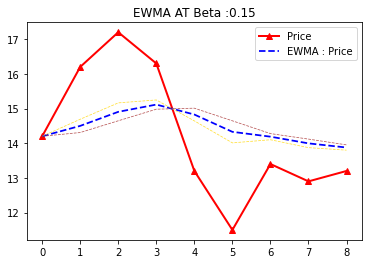

In [9]:
beta = 0.15
ewm_arr ,ewm_arr_bull,ewm_arr_bear = ewma(prices_arr,beta)
plt.title('EWMA AT Beta :' + str(beta))
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price' )
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')
plt.plot(ewm_arr_bull,'gold',linewidth=0.75 ,linestyle='--',alpha=0.8)
plt.plot(ewm_arr_bear,'brown',linewidth=0.75  ,linestyle='--',alpha=0.8)

plt.legend()
plt.show()